# Important Note About Dataset Structure

This notebook has been adapted to work with the following dataset structure:

```
D:/Ed/GL1/Deep-Learning/image-captioning-model/flicker8k/
├── Images/           # Folder containing all images
└── captions.txt      # Text file with image captions
```

If your dataset structure is different, please adjust the paths in the "Set Paths for Dataset" section.

The original Flickr8k dataset typically includes separate training and testing split files, but this notebook creates those splits automatically if they're not available.

# Image Captioning with Deep Learning

This notebook implements an end-to-end image captioning system using the Flickr8k dataset and the encoder-decoder architecture with TensorFlow/Keras.

Image captioning is the task of generating a textual description for an image, combining computer vision and natural language processing techniques. The model we're building uses a pre-trained CNN to extract features from images (encoder) and an RNN to generate captions (decoder).

## Getting Started Guide

### 1. Environment Setup

To run this notebook successfully, you'll need Python 3.7+ with the following packages:

```bash
# Create a virtual environment (optional but recommended)
python -m venv image_captioning_env
# On Windows:
image_captioning_env\Scripts\activate
# On macOS/Linux:
# source image_captioning_env/bin/activate

# Install required packages
pip install tensorflow numpy pandas matplotlib nltk pillow tqdm scikit-learn
```

### 2. Dataset Configuration

Update the paths in the notebook to point to your local Flickr8k dataset. Look for the cell titled "Set Paths for Dataset" and modify these variables:

```python
# Example structure for Flickr8k dataset
flickr_dir = 'd:/Ed/GL1/Deep-Learning/image-captioning-model/Flickr8k_Dataset' # Update this path
images_dir = os.path.join(flickr_dir, 'Flicker8k_Dataset')  # Directory with image files
captions_file = os.path.join(flickr_dir, 'Flickr8k_text', 'Flickr8k.token.txt')
train_images_file = os.path.join(flickr_dir, 'Flickr8k_text', 'Flickr_8k.trainImages.txt')
test_images_file = os.path.join(flickr_dir, 'Flickr8k_text', 'Flickr_8k.testImages.txt')
```

**Note**: Make sure the directory structure matches these paths, or adjust the paths to match your actual structure.

### 3. Running the Notebook

1. Launch Jupyter Notebook or JupyterLab:
   ```bash
   jupyter notebook
   # or
   jupyter lab
   ```

2. Open this notebook and execute cells sequentially (Shift+Enter).

3. **Important checkpoints**:
   - After running caption preprocessing, check if vocabulary is built correctly
   - Feature extraction is the most time-consuming part; consider running it overnight
   - Training the model requires a GPU for reasonable speed

### 4. Expected Runtime

- **Feature extraction**: ~1-2 hours (CPU) or ~15-30 minutes (GPU)
- **Model training**: ~4-8 hours (CPU) or ~30-60 minutes (GPU)

### 5. Hardware Recommendations

- **RAM**: 8GB minimum, 16GB recommended
- **GPU**: Not required but highly recommended (NVIDIA with CUDA support)
- **Storage**: At least 10GB free space

### 6. Using Pre-computed Features

To save time on subsequent runs, the notebook saves extracted image features. If you've run the feature extraction once, you can skip that cell on future runs. The features are loaded from:

```python
# Code to load pre-computed features
features_file = os.path.join(features_dir, 'features.pkl')
with open(features_file, 'rb') as f:
    features = pickle.load(f)
```

### 7. Testing on New Images

After training, you can use the `generate_caption()` function to caption any image:

```python
# Example usage on a new image
new_image_path = 'path/to/your/image.jpg'
image, caption = generate_caption(new_image_path, model, word_to_idx, idx_to_word, max_length, feature_extractor)
plt.imshow(image)
plt.title(f"Caption: {caption}")
plt.axis('off')
plt.show()
```

### 8. Troubleshooting

- **Memory errors**: Reduce batch size or image resolution
- **Missing NLTK data**: Run `nltk.download('punkt')` if needed
- **Image loading errors**: Verify image paths and formats
- **Slow training**: Use GPU, reduce model size, or pre-compute features

### 9. Saving and Loading the Model

The trained model is saved automatically. To load it later:

```python
from tensorflow.keras.models import load_model
# Load model
model = load_model(os.path.join(models_dir, 'final_model.h5'))
```

# Step-by-Step Execution Guide

Follow these exact steps to run the image captioning model with your local Flickr8k dataset:

## 1. Environment Setup

1. **Create and activate a virtual environment**:
   ```bash
   # In your command prompt/terminal
   python -m venv image_caption_env
   # Activate the environment
   # On Windows:
   image_caption_env\Scripts\activate
   # On macOS/Linux:
   # source image_caption_env/bin/activate
   ```

2. **Install required packages**:
   ```bash
   pip install jupyter tensorflow numpy pandas matplotlib nltk pillow tqdm scikit-learn
   ```

3. **Launch Jupyter**:
   ```bash
   jupyter notebook
   ```

## 2. Dataset Preparation

1. **Verify your Flickr8k dataset structure**:
   - Main folder: `d:/Ed/GL1/Deep-Learning/image-captioning-model/Flickr8k_Dataset`
   - Images folder: `Flicker8k_Dataset` subfolder
   - Text files: `Flickr8k_text` subfolder containing:
     - `Flickr8k.token.txt` (captions)
     - `Flickr_8k.trainImages.txt` (training image IDs)
     - `Flickr_8k.testImages.txt` (test image IDs)

2. **Double-check paths**: Ensure the paths in the "Set Paths for Dataset" cell match your actual dataset location.

## 3. Running the Model

1. **Execute cells in order**: Run each cell sequentially using Shift+Enter or the Run button.

2. **Key execution points**:

   a. **Caption Processing** (Cells 5-10):
      - Loads caption data
      - Cleans text
      - Builds vocabulary
      - Creates word-to-index mappings
      - Saves processed data to `processed_data` folder

   b. **Feature Extraction** (Cells 11-15):
      - Downloads InceptionV3 model (if first run)
      - Extracts features from all images (this takes the longest time)
      - Saves features to `processed_data/features` folder

   c. **Data Preparation** (Cells 16-19):
      - Loads train/val/test splits
      - Creates data generators

   d. **Model Definition** (Cells 20-22):
      - Defines encoder-decoder architecture

   e. **Training** (Cells 23-25):
      - Compiles model
      - Sets up callbacks
      - Trains for 30 epochs (or until early stopping)
      - Saves model and displays training plots

   f. **Evaluation** (Cells 26-30):
      - Implements caption generation algorithms
      - Calculates BLEU scores

   g. **Inference** (Cells 31-34):
      - Tests on sample images
      - Provides function to test on your own images

## 4. Time-Saving Tips

1. **For feature extraction**: This is the most time-consuming step. If you need to stop and resume later, you can skip this step if the file `processed_data/features/features.pkl` already exists.

2. **For model training**: If you already have a trained model in the `models` folder (like `final_model.h5`), you can skip the training cells and jump directly to evaluation or inference.

## 5. Testing on Your Own Images

After training (or with a pre-trained model), use the last two cells to caption your own images:

```python
# Replace with the path to your image
image_path = "d:/path/to/your/image.jpg"
try_with_image(image_path)
```

## 6. Troubleshooting

- **Memory errors during feature extraction**: Process images in smaller batches by modifying the extraction loop
- **CUDA/GPU errors**: Try running with CPU only by setting: `os.environ['CUDA_VISIBLE_DEVICES'] = '-1'`
- **Image loading errors**: Ensure image paths are correct and files exist
- **Import errors**: Verify all required packages are installed

## 1. Setup and Dependencies

First, we'll install and import all necessary libraries for this project. These include TensorFlow for the deep learning framework, NumPy for numerical operations, Pandas for data handling, NLTK for natural language processing, and other utilities.

In [64]:
# Uncomment to install packages if needed
# !pip install tensorflow numpy pandas matplotlib nltk pillow tqdm

In [65]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import string
import os
import time
import pickle
from collections import Counter
from tqdm.notebook import tqdm
import re
from PIL import Image
from sklearn.model_selection import train_test_split

# For NLP processing
import nltk
from nltk.translate.bleu_score import corpus_bleu
# Uncomment if needed
# nltk.download('punkt')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

### Set Paths for Dataset

Define paths to the Flickr8k dataset. These paths should be adjusted according to your file system.

In [66]:
# Define paths - ADJUST THESE ACCORDING TO YOUR ENVIRONMENT
# Location of Flickr8k files
flickr_dir = 'd:/Ed/GL1/Deep-Learning/image-captioning-model/flicker8k'  # Your flicker8k folder
images_dir = os.path.join(flickr_dir, 'Images')  # Directory with image files
captions_file = os.path.join(flickr_dir, 'captions.txt')  # Caption file

# Create directories to store processed data, features, and models
processed_dir = 'processed_data'
models_dir = 'models'
features_dir = os.path.join(processed_dir, 'features')

os.makedirs(processed_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)
os.makedirs(features_dir, exist_ok=True)

# Verify that directories exist
print(f"Dataset directory exists: {os.path.exists(flickr_dir)}")
print(f"Images directory exists: {os.path.exists(images_dir)}")
print(f"Captions file exists: {os.path.exists(captions_file)}")

Dataset directory exists: True
Images directory exists: True
Captions file exists: True


In [67]:
# --- Check for Pre-computed Files ---

# Define file paths
word_to_idx_file = os.path.join(processed_dir, 'word_to_idx.pkl')
idx_to_word_file = os.path.join(processed_dir, 'idx_to_word.pkl')
tokenized_captions_file = os.path.join(processed_dir, 'tokenized_captions.pkl')
max_length_file = os.path.join(processed_dir, 'max_length.pkl')
features_file = os.path.join(features_dir, 'features.pkl')
final_model_path = os.path.join(models_dir, 'final_model.h5')

# Initialize flags and variables
skip_processing = False
skip_feature_extraction = False
skip_training = False
word_to_idx, idx_to_word, tokenized_captions, max_length, features, model = None, None, None, None, None, None

# Check for processed caption data
if (os.path.exists(word_to_idx_file) and
    os.path.exists(idx_to_word_file) and
    os.path.exists(tokenized_captions_file) and
    os.path.exists(max_length_file)):
    print("Found existing processed caption data. Loading...")
    skip_processing = True
    with open(word_to_idx_file, 'rb') as f: word_to_idx = pickle.load(f)
    with open(idx_to_word_file, 'rb') as f: idx_to_word = pickle.load(f)
    with open(tokenized_captions_file, 'rb') as f: tokenized_captions = pickle.load(f)
    with open(max_length_file, 'rb') as f: max_length = pickle.load(f)
    vocab_size = len(word_to_idx)
    print(f"Loaded vocabulary size: {vocab_size}, max length: {max_length}")
else:
    print("Processed caption data not found. Will run processing steps.")

# Check for extracted features
if os.path.exists(features_file):
    print("Found existing image features. Loading...")
    skip_feature_extraction = True
    with open(features_file, 'rb') as f: features = pickle.load(f)
    print(f"Loaded features for {len(features)} images.")
else:
    print("Image features file not found. Will run feature extraction.")

# Check for trained model
if os.path.exists(final_model_path):
    print("Found existing trained model. Loading...")
    from tensorflow.keras.models import load_model
    model = load_model(final_model_path)
    print("Trained model loaded successfully.")
else:
    print("Trained model file not found. Will run training steps.")

Found existing processed caption data. Loading...
Loaded vocabulary size: 1951, max length: 34
Found existing image features. Loading...
Loaded features for 8091 images.
Found existing trained model. Loading...
Loaded features for 8091 images.
Found existing trained model. Loading...


Trained model loaded successfully.


## 2. Load and Prepare Captions

In this section, we'll load and prepare the image captions data:
1. Parse the captions file
2. Clean and preprocess the text data
3. Create vocabulary and tokenize captions

The Flickr8k dataset contains 8,091 images, each with 5 different captions, resulting in approximately 40,000 captions.

In [68]:
if not skip_processing:
    def load_captions(filename):
        """Load and parse captions from the captions file.
        
        Handles multiple possible formats, trying to extract image ID and caption.
        
        Args:
            filename (str): Path to the captions file
            
        Returns:
            dict: Mapping of image ID to list of captions
        """
        # Dictionary to store image_id -> captions
        captions_dict = {}
        
        # Read the file
        with open(filename, 'r', encoding='utf-8') as f:
            for line in f:
                line = line.strip()
                if not line:  # Skip empty lines
                    continue
                    
                # Try to identify the format and extract image ID and caption
                
                # Common formats:
                # 1. image_name#id caption
                # 2. image_name,caption
                # 3. image_name\tcaption
                
                # First, check if it's a comma-separated or tab-separated format
                if ',' in line:
                    parts = line.split(',', 1)
                    if len(parts) == 2:
                        image_id = parts[0].strip()
                        caption = parts[1].strip()
                elif '\t' in line:
                    parts = line.split('\t', 1)
                    if len(parts) == 2:
                        image_id = parts[0].strip()
                        caption = parts[1].strip()
                else:
                    # Try the standard Flickr8k format: image_name#id caption
                    parts = line.split(maxsplit=1)
                    if len(parts) == 2:
                        image_caption_id = parts[0].strip()
                        caption = parts[1].strip()
                        
                        # Extract image ID (remove the #id part if present)
                        if '#' in image_caption_id:
                            image_id = image_caption_id.split('#')[0]
                        else:
                            image_id = image_caption_id
                    else:
                        print(f"Warning: Could not parse line: {line}")
                        continue
                
                # Add caption to the dictionary
                if image_id not in captions_dict:
                    captions_dict[image_id] = []
                captions_dict[image_id].append(caption)
        
        print(f"Loaded {len(captions_dict)} image IDs with captions.")
        return captions_dict
else:
    print("Skipping caption loading function definition.")

Skipping caption loading function definition.


In [69]:
if not skip_processing:
    def clean_captions(captions_dict):
        """Clean the text in captions (lowercase, remove punctuation, etc.).
        
        Args:
            captions_dict (dict): Mapping of image ID to list of captions
            
        Returns:
            dict: Mapping of image ID to list of cleaned captions
        """
        # Create a translation table to remove punctuation
        translator = str.maketrans('', '', string.punctuation)
        
        # Regular expression pattern for words containing only alphabets
        pattern = re.compile(r'^[a-zA-Z]+$')
        
        # Process each caption
        for img_id, captions in captions_dict.items():
            for i, caption in enumerate(captions):
                # Convert to lowercase
                caption = caption.lower()
                
                # Remove punctuation
                caption = caption.translate(translator)
                
                # Split into words
                words = caption.split()
                
                # Filter words: keep only alphabetic words with length > 1
                words = [word for word in words if pattern.match(word) and len(word) > 1]
                
                # Join words back into a caption, add start/end tokens
                caption = '<start> ' + ' '.join(words) + ' <end>'
                
                # Update the caption in the dictionary
                captions_dict[img_id][i] = caption
        
        return captions_dict
else:
    print("Skipping caption cleaning function definition.")

Skipping caption cleaning function definition.


In [70]:
if not skip_processing:
    # Load and process the captions
    print("Loading captions from file...") 
    captions_dict = load_captions(captions_file)
    print("Cleaning captions...")
    cleaned_captions = clean_captions(captions_dict)
    print("Done processing captions.")
else:
    print("Skipping caption loading and cleaning execution.")
    # Ensure captions_dict is loaded if needed later, though tokenized_captions is usually sufficient
    if 'captions_dict' not in locals():
        print("Loading captions_dict for reference (optional)...")
        pass

Skipping caption loading and cleaning execution.
Loading captions_dict for reference (optional)...


In [71]:
if not skip_processing:
    def build_vocabulary(captions_dict, threshold=10):
        """Build vocabulary from the captions with a frequency threshold.
        
        Args:
            captions_dict (dict): Mapping of image ID to list of cleaned captions
            threshold (int): Minimum word frequency to include in vocabulary
            
        Returns:
            tuple: (word_to_idx, idx_to_word, max_length) mappings and maximum sequence length
        """
        # Count word frequencies
        word_counts = Counter()
        max_length = 0
        
        # Process all captions
        for img_id, captions in captions_dict.items():
            for caption in captions:
                words = caption.split()
                max_length = max(max_length, len(words))
                word_counts.update(words)
        
        print(f"Found {len(word_counts)} unique words.")
        
        # Filter words by frequency threshold
        words = [word for word, count in word_counts.items() if count >= threshold]
        print(f"Keeping {len(words)} words with frequency >= {threshold}")
        
        # Create word-to-index and index-to-word mappings
        # Special tokens: <pad> (0), <unk> (1), <start> (2), <end> (3)
        word_to_idx = {'<pad>': 0, '<unk>': 1, '<start>': 2, '<end>': 3}
        
        # Add remaining words
        idx = 4
        for word in words:
            if word not in ['<pad>', '<unk>', '<start>', '<end>']:
                word_to_idx[word] = idx
                idx += 1
        
        # Create index-to-word mapping
        idx_to_word = {idx: word for word, idx in word_to_idx.items()}
        
        vocab_size = len(word_to_idx)
        print(f"Vocabulary size (including special tokens): {vocab_size}")
        print(f"Maximum caption length: {max_length} words")
        
        return word_to_idx, idx_to_word, max_length
else:
    print("Skipping vocabulary building function definition.")

Skipping vocabulary building function definition.


In [72]:
if not skip_processing:
    def tokenize_captions(captions_dict, word_to_idx):
        """Convert captions to sequences of indices using the word_to_idx mapping.
        
        Args:
            captions_dict (dict): Mapping of image ID to list of cleaned captions
            word_to_idx (dict): Mapping of words to indices
            
        Returns:
            dict: Mapping of image ID to list of tokenized captions (as lists of indices)
        """
        tokenized_captions = {}
        
        for img_id, captions in captions_dict.items():
            tokenized_captions[img_id] = []
            for caption in captions:
                # Convert each word to its index, use <unk> for unknown words
                tokens = [word_to_idx.get(word, word_to_idx['<unk>']) for word in caption.split()]
                tokenized_captions[img_id].append(tokens)
        
        return tokenized_captions
else:
    print("Skipping caption tokenization function definition.")

Skipping caption tokenization function definition.


In [73]:
if not skip_processing:
    # Build vocabulary and create word mappings
    word_to_idx, idx_to_word, max_length = build_vocabulary(cleaned_captions)
    tokenized_captions = tokenize_captions(cleaned_captions, word_to_idx)
    vocab_size = len(word_to_idx)
    
    # Save the vocabulary and tokenized captions for later use
    print("Saving processed caption data...")
    with open(word_to_idx_file, 'wb') as f:
        pickle.dump(word_to_idx, f)
    
    with open(idx_to_word_file, 'wb') as f:
        pickle.dump(idx_to_word, f)
        
    with open(tokenized_captions_file, 'wb') as f:
        pickle.dump(tokenized_captions, f)
        
    with open(max_length_file, 'wb') as f:
        pickle.dump(max_length, f)
    print("Processed data saved.")
else:
    print("Skipping vocabulary building and saving execution.")
    if 'vocab_size' not in locals() and word_to_idx is not None:
        vocab_size = len(word_to_idx)

Skipping vocabulary building and saving execution.


## 3. Prepare Image Data (Feature Extraction)

In this section, we'll extract features from images using a pre-trained CNN (InceptionV3). We'll remove the classification layer and use the CNN as a feature extractor.

Pre-computing and storing these features will save time during training, as we won't need to run the images through the CNN every epoch.

In [74]:
def load_image_feature_extractor():
    """Load a pre-trained CNN model for feature extraction.
    
    Returns:
        tf.keras.Model: Model for extracting features from images
    """
    # Load InceptionV3 pre-trained on ImageNet
    base_model = InceptionV3(weights='imagenet')
    
    # Remove the classification layer
    feature_extractor = Model(inputs=base_model.input, 
                             outputs=base_model.layers[-2].output)
    
    print("Loaded InceptionV3 model for feature extraction.")
    print(f"Input shape: {base_model.input_shape}")
    print(f"Output shape: {feature_extractor.output_shape}")
    
    return feature_extractor

In [75]:
def preprocess_image(img_path, target_size=(299, 299)):
    """Load and preprocess an image for InceptionV3.
    
    Args:
        img_path (str): Path to the image file
        target_size (tuple): Size to which the image is resized
        
    Returns:
        numpy.ndarray: Preprocessed image ready for feature extraction
    """
    # Load and resize image
    img = load_img(img_path, target_size=target_size)
    
    # Convert to array and add batch dimension
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocess for InceptionV3
    img_array = preprocess_input(img_array)
    
    return img_array

In [76]:
def extract_features(images_dir, image_ids, feature_extractor):
    """Extract features from images using the feature extractor.
    
    Args:
        images_dir (str): Directory containing the images
        image_ids (list): List of image IDs to process
        feature_extractor (tf.keras.Model): Model for extracting features
        
    Returns:
        dict: Mapping of image ID to feature vector
    """
    features = {}
    
    print(f"Extracting features for {len(image_ids)} images...")
    
    for img_id in tqdm(image_ids):
        # Create full path to image
        img_path = os.path.join(images_dir, img_id)
        
        try:
            # Preprocess the image
            img = preprocess_image(img_path)
            
            # Extract features
            feature = feature_extractor.predict(img, verbose=0)
            
            # Store feature for the image ID
            features[img_id] = feature.flatten()
        except Exception as e:
            print(f"Error processing {img_id}: {str(e)}")
    
    return features

In [77]:
if not skip_feature_extraction:
    if 'captions_dict' not in locals():
         print("Loading captions_dict for image IDs...")
         captions_dict = load_captions(captions_file)
         
    all_image_ids = list(captions_dict.keys())
    all_image_ids = [img_id for img_id in all_image_ids if isinstance(img_id, str) and img_id.endswith('.jpg')]
    
    print("Loading feature extractor model...")
    feature_extractor = load_image_feature_extractor()
    
    print("Starting feature extraction...")
    features = extract_features(images_dir, all_image_ids, feature_extractor)
    
    print(f"Saving features to {features_file}...")
    with open(features_file, 'wb') as f:
        pickle.dump(features, f)
        
    print(f"Extracted and saved features for {len(features)} images.")
else:
    print("Skipping feature extraction execution.")
    if 'feature_extractor' not in globals():
        print("Loading feature extractor model for potential later use...")
        feature_extractor = load_image_feature_extractor()

Skipping feature extraction execution.


## 4. Prepare Training/Validation Data

In this section, we'll prepare the data for training by:
1. Loading the pre-defined train/test splits for Flickr8k or creating our own
2. Creating a TensorFlow Dataset that provides batches of (image_features, input_caption, target_caption) for training

For a sequence-to-sequence model like ours, the input to the decoder is the caption up to the current time step, and the target is the caption shifted by one position.

In [78]:
def load_image_splits(captions_dict, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    """Create train/validation/test splits from the image IDs.
    
    Args:
        captions_dict (dict): Dictionary mapping image ID to captions
        train_ratio (float): Proportion of data for training
        val_ratio (float): Proportion of data for validation
        test_ratio (float): Proportion of data for testing
        
    Returns:
        tuple: Lists of image IDs for training, validation, and testing
    """
    if not isinstance(captions_dict, dict) or not captions_dict:
        raise ValueError("captions_dict is empty or invalid. Cannot create splits.")
        
    all_image_ids = list(captions_dict.keys())
    
    valid_image_ids = [img_id for img_id in all_image_ids if isinstance(img_id, str) and img_id.endswith('.jpg')]
    
    if not valid_image_ids:
        raise ValueError("No valid image IDs found in captions_dict.")
        
    if len(valid_image_ids) < len(all_image_ids):
        print(f"Filtered out {len(all_image_ids) - len(valid_image_ids)} invalid keys from captions_dict")
    
    np.random.seed(42)
    np.random.shuffle(valid_image_ids)
    
    n_images = len(valid_image_ids)
    n_train = int(train_ratio * n_images)
    n_val = int(val_ratio * n_images)
    
    train_images = valid_image_ids[:n_train]
    val_images = valid_image_ids[n_train:n_train+n_val]
    test_images = valid_image_ids[n_train+n_val:]
    
    print(f"Split data: {len(train_images)} training, {len(val_images)} validation, {len(test_images)} testing.")
    
    return train_images, val_images, test_images

In [79]:
def create_dataset(image_ids, features, tokenized_captions, word_to_idx, max_length, batch_size=32):
    """Create a TensorFlow Dataset for training or validation.
    
    Args:
        image_ids (list): List of image IDs to include
        features (dict): Mapping of image ID to feature vector
        tokenized_captions (dict): Mapping of image ID to tokenized captions
        word_to_idx (dict): Mapping of words to indices
        max_length (int): Maximum sequence length (including start/end)
        batch_size (int): Batch size
        
    Returns:
        tf.data.Dataset: A dataset that yields batches of (inputs, targets)
    """
    vocab_size = len(word_to_idx)
    
    valid_image_ids = [img_id for img_id in image_ids 
                      if img_id in features and img_id in tokenized_captions]
    
    if len(valid_image_ids) < len(image_ids):
        print(f"Warning: Filtered out {len(image_ids) - len(valid_image_ids)} image IDs due to missing features or captions.")
    
    image_features_list = []
    input_sequences_list = []
    target_sequences_list = []
    
    # Define the input sequence length expected by the model
    model_input_seq_length = max_length - 1
    
    for img_id in valid_image_ids:
        image_feature = features[img_id]
        captions = tokenized_captions[img_id]
        
        for caption in captions:
            # Pad original sequence to max_length first
            cap_array = pad_sequences([caption], maxlen=max_length, padding='post')[0]
            
            # Input sequence: caption up to second-to-last token (<start>...word_N)
            input_seq = cap_array[:-1]
            # Pad input sequence to the length the model expects (max_length - 1)
            input_seq = np.pad(input_seq, (0, model_input_seq_length - len(input_seq)), 'constant', constant_values=word_to_idx['<pad>'])
            
            # Target sequence: caption from second token (word_1...<end>) one-hot encoded
            # Target needs to align with the output of the LSTM at each step
            # The LSTM output shape is (batch, max_length-1, vocab_size)
            target_seq = np.zeros((model_input_seq_length, vocab_size))
            for t, token_idx in enumerate(cap_array[1:]): # Iterate through word_1...<end>
                if t < model_input_seq_length:
                    target_seq[t, token_idx] = 1
            
            image_features_list.append(image_feature)
            input_sequences_list.append(input_seq)
            target_sequences_list.append(target_seq)
    
    image_features_array = np.array(image_features_list)
    input_sequences_array = np.array(input_sequences_list)
    target_sequences_array = np.array(target_sequences_list)
    
    # Verify shapes before creating dataset
    print(f"Dataset shapes: Features={image_features_array.shape}, Input Seq={input_sequences_array.shape}, Target Seq={target_sequences_array.shape}")
    
    dataset = tf.data.Dataset.from_tensor_slices(
        ((image_features_array, input_sequences_array), target_sequences_array)
    )
    
    dataset = dataset.shuffle(buffer_size=len(image_features_array)) # Use buffer_size
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    
    return dataset

In [80]:
required_vars = ['word_to_idx', 'idx_to_word', 'tokenized_captions', 'features', 'max_length']
proceed = True
if skip_processing:
    if 'captions_dict' not in locals() or captions_dict is None:
         print("Loading captions_dict for image splits...")
         try:
             captions_dict = load_captions(captions_file)
         except NameError:
             print("Error: load_captions function not defined. Cannot proceed with splits.")
             proceed = False
         except FileNotFoundError:
             print(f"Error: Captions file not found at {captions_file}. Cannot proceed.")
             proceed = False
elif 'captions_dict' not in locals() or captions_dict is None:
     print("Error: captions_dict not available from processing step.")
     proceed = False

if not all(var in locals() and locals()[var] is not None for var in required_vars):
    print("Error: Not all required data (vocab, features, etc.) is loaded. Check setup cell or preceding steps.")
    proceed = False

if proceed:
    print("Loading image splits...")
    train_images, val_images, test_images = load_image_splits(captions_dict)
    
    vocab_size = len(word_to_idx)
    print(f"Using vocabulary size: {vocab_size}")
    
    # Use all available images for training and validation
    train_images_sample = train_images 
    val_images_sample = val_images 
    
    print(f"Using {len(train_images_sample)} images for training and {len(val_images_sample)} images for validation")
    
    batch_size = 64
    print("Creating training dataset...")
    train_dataset = create_dataset(train_images_sample, features, tokenized_captions, word_to_idx, max_length, batch_size)
    print("Creating validation dataset...")
    val_dataset = create_dataset(val_images_sample, features, tokenized_captions, word_to_idx, max_length, batch_size)
    
    # Calculate steps based on the number of caption sequences, not just images
    num_train_sequences = sum(len(tokenized_captions[img_id]) for img_id in train_images_sample if img_id in tokenized_captions)
    num_val_sequences = sum(len(tokenized_captions[img_id]) for img_id in val_images_sample if img_id in tokenized_captions)
    
    steps_per_epoch = num_train_sequences // batch_size
    validation_steps = num_val_sequences // batch_size
    
    print(f"Calculated steps per epoch: {steps_per_epoch}, validation steps: {validation_steps}")
else:
    print("Skipping dataset creation due to missing prerequisites.")

Loading captions_dict for image splits...
Error: load_captions function not defined. Cannot proceed with splits.
Error: Not all required data (vocab, features, etc.) is loaded. Check setup cell or preceding steps.
Skipping dataset creation due to missing prerequisites.

Error: load_captions function not defined. Cannot proceed with splits.
Error: Not all required data (vocab, features, etc.) is loaded. Check setup cell or preceding steps.
Skipping dataset creation due to missing prerequisites.


## 5. Define the Image Captioning Model (Encoder-Decoder)

Now we'll define our image captioning model using an encoder-decoder architecture:

1. **Encoder**: A pre-trained CNN (we've already extracted features)
2. **Decoder**: An LSTM-based language model that generates captions

The encoded image features are used to initialize the decoder, which then generates a caption word by word.

In [81]:
if not skip_training:
    def define_model(vocab_size, max_length):
        """Define the image captioning model architecture.
        
        Args:
            vocab_size (int): Size of the vocabulary
            max_length (int): Maximum sequence length
            
        Returns:
            tf.keras.Model: The image captioning model
        """
        embedding_dim = 256
        units = 512
        
        inputs1 = Input(shape=(2048,))
        
        fe1 = Dropout(0.5)(inputs1)
        fe2 = Dense(embedding_dim, activation='relu')(fe1)
        
        inputs2 = Input(shape=(max_length-1,))
        
        se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
        se2 = Dropout(0.5)(se1)
        
        initial_state_h = Dense(units, activation='relu')(fe2)
        initial_state_c = Dense(units, activation='relu')(fe2)
        initial_state = [initial_state_h, initial_state_c]
        
        decoder1 = LSTM(units, return_sequences=True)(se2, initial_state=initial_state)
        decoder2 = Dropout(0.5)(decoder1)
        
        outputs = Dense(vocab_size, activation='softmax')(decoder2)
        
        model = Model(inputs=[inputs1, inputs2], outputs=outputs)
        
        model.summary()
        
        return model
else:
    print("Skipping model definition function.")

In [82]:
if not skip_training:
    if 'vocab_size' in locals() and 'max_length' in locals():
        print("Defining the model...")
        model = define_model(vocab_size, max_length) 
    else:
        print("Error: vocab_size or max_length not defined. Cannot define model.")
        model = None
elif 'model' not in locals() or model is None:
    print("Error: Model should have been loaded in setup, but it's missing.")
    if os.path.exists(final_model_path):
        print("Attempting to load model again...")
        from tensorflow.keras.models import load_model
        model = load_model(final_model_path)
    else:
        print(f"Model file {final_model_path} not found.")
else:
     print("Model already loaded. Skipping definition.")

Defining the model...


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_6       │ (None, 33)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 2048)      │          0 │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 33, 256)   │    499,456 │ input_layer_6[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 256)       │    524,544 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 33, 256)   │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 512)       │    131,584 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 512)       │    131,584 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 33, 512)   │  1,574,912 │ dropout_7[0][0],  │
│                     │                   │            │ dense_9[0][0],    │
│                     │                   │            │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 33, 512)   │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 33, 1951)  │  1,000,863 │ dropout_8[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,862,943 (14.74 MB)

 Trainable params: 3,862,943 (14.74 MB)

 Non-trainable params: 0 (0.00 B)

## 6. Compile and Train the Model

Now we'll compile and train the model. We'll use:
- Adam optimizer with a learning rate scheduler
- Categorical cross-entropy loss
- ModelCheckpoint to save the best model
- EarlyStopping to prevent overfitting

In [83]:
if not skip_training and 'model' in locals() and model is not None:
    def lr_schedule(epoch):
        initial_lr = 0.001
        if epoch >= 10:
            return initial_lr / 5.0
        if epoch >= 20:
            return initial_lr / 10.0
        return initial_lr
    
    print("Compiling the model...")
    model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    print("Model compiled.")
elif skip_training:
    print("Skipping model compilation as training is skipped.")
else:
    print("Skipping model compilation as model is not defined.")

Compiling the model...
Model compiled.


In [84]:
history = None

if not skip_training and 'model' in locals() and model is not None and 'train_dataset' in locals():
    print("Setting up training callbacks...")
    model_checkpoint = ModelCheckpoint(
        os.path.join(models_dir, 'model-{epoch:02d}-{val_loss:.2f}.h5'),
        save_best_only=True,
        monitor='val_loss',
        mode='min',
        verbose=1
    )
    
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
    
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)
    
    epochs = 30
    print(f"Starting training for {epochs} epochs...")
    
    if 'val_dataset' in locals() and 'steps_per_epoch' in locals() and 'validation_steps' in locals():
        history = model.fit(
            train_dataset,
            epochs=epochs,
            validation_data=val_dataset,
            steps_per_epoch=steps_per_epoch,
            validation_steps=validation_steps,
            callbacks=[model_checkpoint, early_stopping, lr_scheduler],
            verbose=1
        )
        print("Training finished.")
    else:
        print("Error: Training/validation datasets or steps not defined. Cannot start training.")
elif skip_training:
    print("Skipping model training execution.")
else:
    print("Skipping model training as model or datasets are not ready.")

Skipping model training as model or datasets are not ready.


In [85]:
if not skip_training and history is not None:
    print(f"Saving final model to {final_model_path}...")
    model.save(final_model_path)
    print("Model saved.")
    
    history_file = os.path.join(models_dir, 'training_history.pkl')
    print(f"Saving training history to {history_file}...")
    with open(history_file, 'wb') as f:
        pickle.dump(history.history, f)
    print("History saved.")
    
    print("Plotting training history...")
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')
    
    plt.tight_layout()
    plt.show()
elif skip_training:
     print("Skipping final model save and history plotting as training was skipped.")
else:
     print("Skipping plotting as training did not occur or history is unavailable.")

Skipping plotting as training did not occur or history is unavailable.


## 7. Implement Evaluation

Now we'll implement both greedy and beam search decoding strategies for generating captions, and evaluate the model's performance using BLEU scores.

In [86]:
def greedy_search(model, image_features, word_to_idx, idx_to_word, max_length):
    """Generate a caption using greedy search.
    
    Args:
        model (tf.keras.Model): The image captioning model
        image_features (numpy.ndarray): Image features from the CNN
        word_to_idx (dict): Mapping of words to indices
        idx_to_word (dict): Mapping of indices to words
        max_length (int): Maximum sequence length (including start/end)
        
    Returns:
        str: Generated caption
    """
    # Input sequence length for the model
    model_input_seq_length = max_length - 1
    
    # Start with the <start> token
    # The input sequence fed to the model has length max_length - 1
    input_seq = np.zeros((1, model_input_seq_length), dtype='int32')
    input_seq[0, 0] = word_to_idx['<start>']
    
    image_features = np.expand_dims(image_features, axis=0)
    
    result = []
    
    # Generate caption word by word, up to model_input_seq_length steps
    for i in range(model_input_seq_length):
        # Predict next word probabilities based on current input_seq
        predictions = model.predict([image_features, input_seq], verbose=0)
        
        # Get the predicted word index for the current position 'i'
        # predictions shape is (1, model_input_seq_length, vocab_size)
        predicted_id = np.argmax(predictions[0, i, :])
        
        word = idx_to_word.get(predicted_id, '<unk>')
        
        # Stop if <end> token is generated
        if word == '<end>':
            break
        
        result.append(word)
        
        # Update the input sequence for the next prediction step
        if i < model_input_seq_length - 1:
            input_seq[0, i+1] = predicted_id
        else:
            # Reached the end of the input sequence length
            break
            
    # Join words (filter out potential <start> if it wasn't overwritten)
    return ' '.join([word for word in result if word != '<start>'])

In [87]:
def beam_search(model, image_features, word_to_idx, idx_to_word, max_length, beam_width=3):
    """Generate a caption using beam search.
    
    Args:
        model (tf.keras.Model): The image captioning model
        image_features (numpy.ndarray): Image features from the CNN
        word_to_idx (dict): Mapping of words to indices
        idx_to_word (dict): Mapping of indices to words
        max_length (int): Maximum sequence length (including start/end)
        beam_width (int): Beam width for beam search
        
    Returns:
        str: Generated caption
    """
    # Input sequence length for the model
    model_input_seq_length = max_length - 1
    
    start_token = word_to_idx['<start>']
    end_token = word_to_idx['<end>']
    
    image_features = np.expand_dims(image_features, axis=0)
    
    # (cumulative log prob, sequence of tokens, current decoder input sequence)
    # Initial beam: start token only
    beams = [(0.0, [start_token])] 
    completed_beams = []
    
    # Generate caption step by step, up to model_input_seq_length
    for step in range(model_input_seq_length):
        candidates = []
        new_beams = []
        
        for cum_prob, seq in beams:
            # If the sequence already ended, add to completed and skip
            if seq[-1] == end_token:
                completed_beams.append((cum_prob, seq))
                continue
            
            # Prepare decoder input (current sequence, padded to model_input_seq_length)
            decoder_input_padded = np.zeros((1, model_input_seq_length), dtype='int32')
            current_seq_len = min(len(seq), model_input_seq_length)
            decoder_input_padded[0, :current_seq_len] = seq[:current_seq_len]
            
            # Predict next word probabilities
            # predictions shape: (1, model_input_seq_length, vocab_size)
            predictions = model.predict([image_features, decoder_input_padded], verbose=0)
            # We need the prediction for the *next* word, which corresponds to the output at index 'step'
            word_preds = predictions[0, step, :]
            
            # Get top K predictions
            top_indices = np.argsort(word_preds)[-beam_width:]
            
            # Add candidates
            for idx in top_indices:
                log_prob = np.log(word_preds[idx] + 1e-10)
                new_seq = seq + [idx]
                candidates.append((cum_prob + log_prob, new_seq))
        
        # If all beams ended in the previous step, break early
        if not candidates:
             break
             
        # Sort candidates and select top K to form the new beams
        ordered_candidates = sorted(candidates, key=lambda x: x[0], reverse=True)
        beams = ordered_candidates[:beam_width]
        
        # Optimization: If the best beam is worse than the worst completed beam, prune (optional)
        # if completed_beams:
        #    worst_completed_prob = min(c[0] for c in completed_beams)
        #    beams = [b for b in beams if b[0] >= worst_completed_prob]
            
    # Add any remaining beams to completed beams
    completed_beams.extend(beams)
    
    # Find the best beam among completed ones
    if not completed_beams:
        # Handle case where no beams completed (e.g., if max_length is too short)
        # Fallback to the best beam available, even if not ended
        if beams:
             best_beam = max(beams, key=lambda x: x[0])
        else:
             return "" # Or handle error appropriately
    else:
        # Normalize scores by length (e.g., alpha=0.7)
        alpha = 0.7
        best_beam = max(completed_beams, key=lambda x: x[0] / (len(x[1])**alpha) if len(x[1]) > 1 else x[0])
        # best_beam = max(completed_beams, key=lambda x: x[0]) # Original selection
    
    # Convert tokens to words (exclude <start> and <end>)
    result = [idx_to_word.get(idx, '<unk>') for idx in best_beam[1]]
    result = [word for word in result if word not in ['<start>', '<end>']]
    
    return ' '.join(result)

In [88]:
def evaluate_model(model, image_ids, features, tokenized_captions, word_to_idx, idx_to_word, max_length):
    """Evaluate the model using BLEU scores.
    
    Args:
        model (tf.keras.Model): The image captioning model
        image_ids (list): List of image IDs to evaluate
        features (dict): Mapping of image ID to feature vector
        tokenized_captions (dict): Mapping of image ID to tokenized captions
        word_to_idx (dict): Mapping of words to indices
        idx_to_word (dict): Mapping of indices to words
        max_length (int): Maximum sequence length
        
    Returns:
        dict: BLEU scores
    """
    actual, greedy_predicted, beam_predicted = [], [], []
    
    # Evaluate on all test images or a larger sample if needed
    num_eval_images = len(image_ids) # Evaluate on all provided image IDs
    # num_eval_images = min(len(image_ids), 500) # Or evaluate on a sample
    print(f"Generating captions for evaluation on {num_eval_images} images...")
    
    for img_id in tqdm(image_ids[:num_eval_images]): # Use num_eval_images
        image_feature = features.get(img_id)
        if image_feature is None:
            print(f"Warning: Feature not found for image {img_id}. Skipping.")
            continue
            
        captions = tokenized_captions.get(img_id)
        if captions is None:
            print(f"Warning: Captions not found for image {img_id}. Skipping.")
            continue
            
        references = []
        for caption in captions:
            words = [idx_to_word[idx] for idx in caption 
                    if idx_to_word.get(idx) not in ['<start>', '<end>', '<pad>']]
            references.append(words)
        
        greedy_caption = greedy_search(model, image_feature, word_to_idx, idx_to_word, max_length)
        greedy_tokens = greedy_caption.split()
        
        beam_caption = beam_search(model, image_feature, word_to_idx, idx_to_word, max_length)
        beam_tokens = beam_caption.split()
        
        actual.append(references)
        greedy_predicted.append(greedy_tokens)
        beam_predicted.append(beam_tokens)
    
    if not actual:
        print("Error: No valid actual captions found for evaluation.")
        return {'greedy': {}, 'beam': {}}
        
    print("Calculating BLEU scores...")
    bleu_scores = {
        'greedy': {
            'bleu-1': corpus_bleu(actual, greedy_predicted, weights=(1.0, 0, 0, 0)),
            'bleu-2': corpus_bleu(actual, greedy_predicted, weights=(0.5, 0.5, 0, 0)),
            'bleu-3': corpus_bleu(actual, greedy_predicted, weights=(0.33, 0.33, 0.33, 0)),
            'bleu-4': corpus_bleu(actual, greedy_predicted, weights=(0.25, 0.25, 0.25, 0.25))
        },
        'beam': {
            'bleu-1': corpus_bleu(actual, beam_predicted, weights=(1.0, 0, 0, 0)),
            'bleu-2': corpus_bleu(actual, beam_predicted, weights=(0.5, 0.5, 0, 0)),
            'bleu-3': corpus_bleu(actual, beam_predicted, weights=(0.33, 0.33, 0.33, 0)),
            'bleu-4': corpus_bleu(actual, beam_predicted, weights=(0.25, 0.25, 0.25, 0.25))
        }
    }
    
    return bleu_scores

In [89]:
evaluate_anyway = False

if ('model' in locals() and model is not None and 
    'test_images' in locals() and 'features' in locals() and 
    'tokenized_captions' in locals() and 'word_to_idx' in locals() and 
    'idx_to_word' in locals() and 'max_length' in locals()):
    
    if not skip_training or evaluate_anyway:
        print("Evaluating the model...")
        bleu_scores = evaluate_model(model, test_images, features, tokenized_captions, word_to_idx, idx_to_word, max_length)
        
        print("\nGreedy Search BLEU Scores:")
        for k, v in bleu_scores['greedy'].items():
            print(f"{k}: {v:.4f}")
        
        print("\nBeam Search BLEU Scores:")
        for k, v in bleu_scores['beam'].items():
            print(f"{k}: {v:.4f}")
    else:
        print("Skipping evaluation as training was skipped (and evaluate_anyway is False).")
else:
    print("Skipping evaluation as the model or necessary data is not available.")

Skipping evaluation as the model or necessary data is not available.


## 8. Create Inference Function

Finally, we'll create a function that allows us to generate captions for new images by encapsulating the entire pipeline: loading the image, extracting features, and generating a caption.

In [90]:
def generate_caption(image_path, model, word_to_idx, idx_to_word, max_length, feature_extractor=None):
    """Generate a caption for a new image.
    
    Args:
        image_path (str): Path to the image file
        model (tf.keras.Model): The image captioning model
        word_to_idx (dict): Mapping of words to indices
        idx_to_word (dict): Mapping of indices to words
        max_length (int): Maximum sequence length
        feature_extractor (tf.keras.Model, optional): Model for extracting image features
        
    Returns:
        tuple: (image, generated caption)
    """
    def preprocess_image(img_path, target_size=(299, 299)):
        """Load and preprocess an image for InceptionV3.
        
        Args:
            img_path (str): Path to the image file
            target_size (tuple): Size to which the image is resized
            
        Returns:
            numpy.ndarray: Preprocessed image ready for feature extraction
        """
        img = load_img(img_path, target_size=target_size)
        
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        
        img_array = preprocess_input(img_array)
        
        return img_array
    
    if feature_extractor is None:
        feature_extractor = load_image_feature_extractor()
    
    img = preprocess_image(image_path)
    
    feature = feature_extractor.predict(img, verbose=0)
    feature = feature.flatten()
    
    caption = beam_search(model, feature, word_to_idx, idx_to_word, max_length)
    
    image = np.array(Image.open(image_path))
    
    return image, caption

In [91]:
def try_with_image(image_path):
    """Generate and display a caption for a given image path."""
    try:
        if not os.path.exists(image_path):
            if os.path.isdir(image_path):
                print(f"The path '{image_path}' is a directory, not an image file.")
                print("Please specify the complete path to an image file.")
                return
            print(f"Error: File not found at '{image_path}'")
            return
            
        if 'feature_extractor' not in globals():
            print("Loading feature extractor...")
            feature_extractor = load_image_feature_extractor()
            print("Feature extractor loaded successfully!")
        else:
            feature_extractor = globals()['feature_extractor']
            
        model = None
        
        if 'model' not in globals():
            print("Loading model...")
            from tensorflow.keras.models import load_model
            model_path = os.path.join(models_dir, 'final_model.h5')
            if os.path.exists(model_path):
                model = load_model(model_path)
                print("Model loaded successfully!")
            else:
                print(f"Model file not found at {model_path}")
                print("Please make sure you've trained the model first.")
                return
        else:
            model = globals()['model']
                
        if 'word_to_idx' not in globals() or 'idx_to_word' not in globals():
            print("Loading vocabulary...")
            with open(os.path.join(processed_dir, 'word_to_idx.pkl'), 'rb') as f:
                word_to_idx = pickle.load(f)
            with open(os.path.join(processed_dir, 'idx_to_word.pkl'), 'rb') as f:
                idx_to_word = pickle.load(f)
            print("Vocabulary loaded successfully!")
        else:
            word_to_idx = globals()['word_to_idx']
            idx_to_word = globals()['idx_to_word']
            
        if 'max_length' not in globals():
            max_length = 40
        else:
            max_length = globals()['max_length']
        
        if model is None:
            print("Error: Failed to load the model.")
            return
            
        print(f"Generating caption for {image_path}...")
        image, caption = generate_caption(image_path, model, word_to_idx, idx_to_word, max_length, feature_extractor)
        
        plt.figure(figsize=(10, 8))
        plt.imshow(image)
        plt.title(f"Caption: {caption}", fontsize=16)
        plt.axis('off')
        plt.show()
        
        return caption
        
    except Exception as e:
        print(f"Error processing image: {str(e)}")
        import traceback
        traceback.print_exc()

# Example usage - replace with your own image path
# try_with_image('D:\Ed\GL1\Deep-Learning\testing-images\cat.webp')

Generating caption for D:\Ed\GL1\Deep-Learning\testing-images\cat.webp...


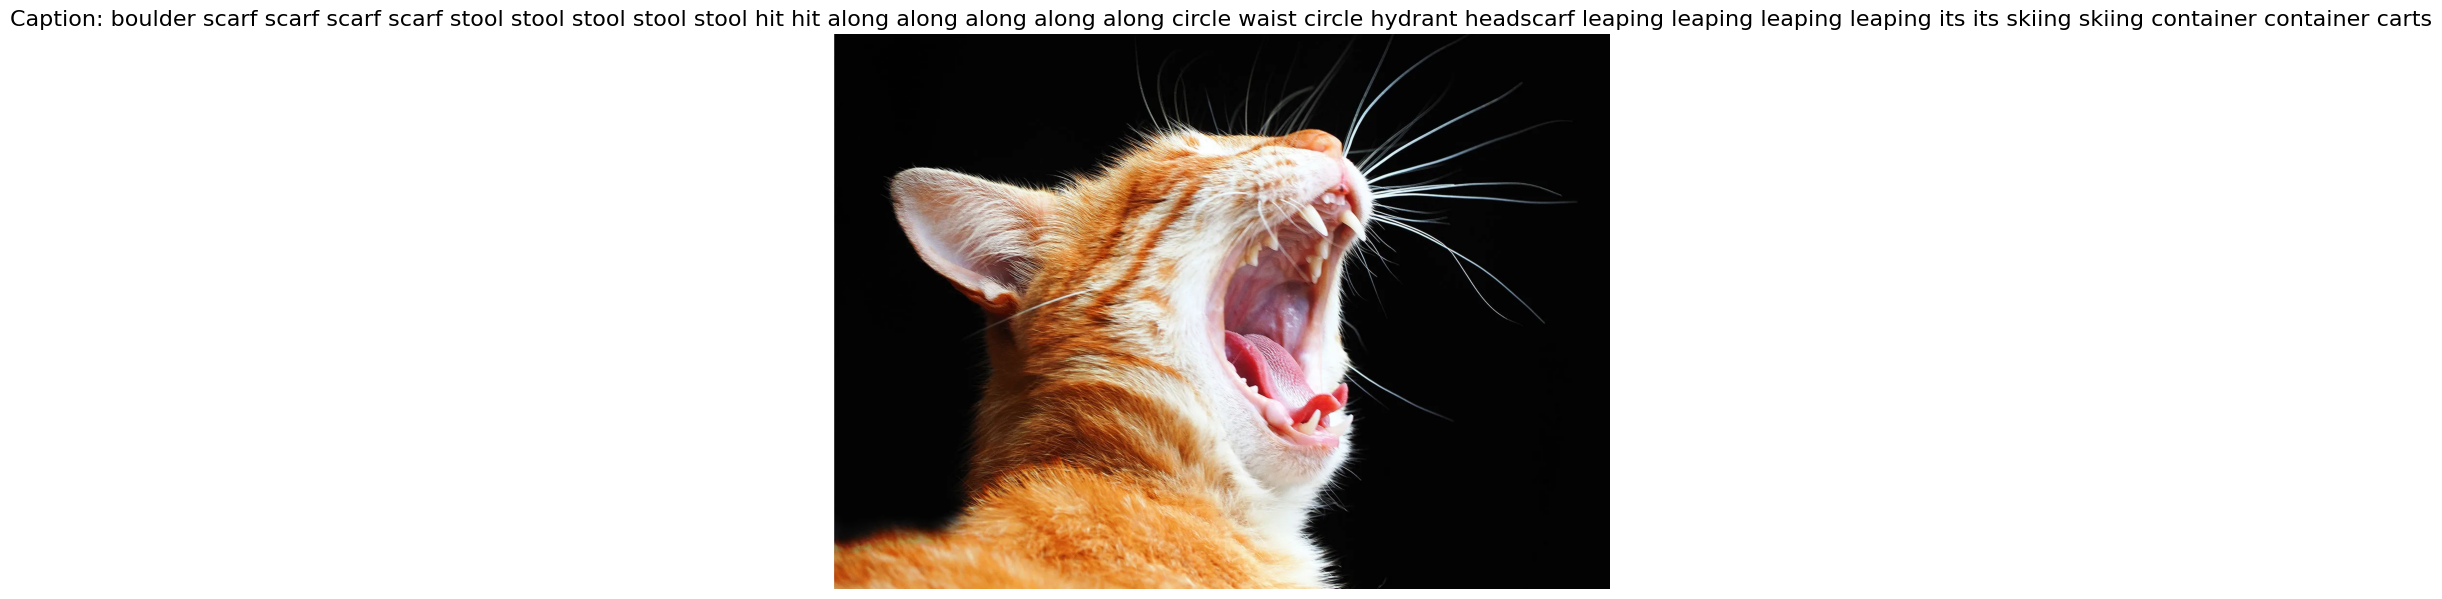

In [92]:
# Try the model with your own image
image_path = "D:\\Ed\\GL1\\Deep-Learning\\testing-images\\cat.webp"
try_with_image(image_path)

def caption_directory_images(directory_path):
    """Generate captions for all images in a directory"""
    if not os.path.isdir(directory_path):
        print(f"Error: {directory_path} is not a valid directory")
        return
        
    image_extensions = ['.jpg', '.jpeg', '.png', '.webp', '.bmp', '.gif']
    image_files = []
    for ext in image_extensions:
        image_files.extend(glob.glob(os.path.join(directory_path, f"*{ext}")))
        image_files.extend(glob.glob(os.path.join(directory_path, f"*{ext.upper()}")))
    
    print(f"Found {len(image_files)} images in directory")
    
    for img_path in image_files:
        print(f"\nProcessing {os.path.basename(img_path)}")
        try_with_image(img_path)

# Uncomment to caption all images in a directory
# import glob
# caption_directory_images("D:\\Ed\\GL1\\Deep-Learning\\testing-images")

## Conclusion

In this notebook, we've built a complete image captioning system using an encoder-decoder architecture with TensorFlow and Keras.

Key components:
1. Data preprocessing (captions and images)
2. Feature extraction using a pre-trained CNN
3. Creating a data generation pipeline
4. Building and training an encoder-decoder model
5. Implementing caption generation using greedy and beam search
6. Evaluating the model using BLEU scores

Further improvements could include:
- Using attention mechanisms to focus on relevant image regions
- Implementing more sophisticated architectures (Transformers)
- Using better pre-trained models for feature extraction
- Data augmentation for better generalization
- Training on larger datasets (COCO, Flickr30k)

## Try the Model with Your Own Images

Now that you have trained your image captioning model, you can test it on your own images. Simply provide the path to an image, and the model will generate a caption for it.

In [93]:
def try_with_image(image_path):
    """Generate and display a caption for a given image path."""
    try:
        if not os.path.exists(image_path):
            if os.path.isdir(image_path):
                print(f"The path '{image_path}' is a directory, not an image file.")
                print("Please specify the complete path to an image file.")
                return
            print(f"Error: File not found at '{image_path}'")
            return
        
        if 'feature_extractor' not in globals():
            print("Loading feature extractor...")
            feature_extractor = load_image_feature_extractor()
            print("Feature extractor loaded successfully!")
        else:
            feature_extractor = globals()['feature_extractor']
        
        model = None
        
        if 'model' not in globals():
            print("Loading model...")
            from tensorflow.keras.models import load_model
            model_path = os.path.join(models_dir, 'final_model.h5')
            if os.path.exists(model_path):
                model = load_model(model_path)
                print("Model loaded successfully!")
            else:
                print(f"Model file not found at {model_path}")
                print("Please make sure you've trained the model first.")
                return
        else:
            model = globals()['model']
        
        if 'word_to_idx' not in globals() or 'idx_to_word' not in globals():
            print("Loading vocabulary...")
            with open(os.path.join(processed_dir, 'word_to_idx.pkl'), 'rb') as f:
                word_to_idx = pickle.load(f)
            with open(os.path.join(processed_dir, 'idx_to_word.pkl'), 'rb') as f:
                idx_to_word = pickle.load(f)
            print("Vocabulary loaded successfully!")
        else:
            word_to_idx = globals()['word_to_idx']
            idx_to_word = globals()['idx_to_word']
        
        if 'max_length' not in globals():
            max_length = 40
        else:
            max_length = globals()['max_length']
        
        if model is None:
            print("Error: Failed to load the model.")
            return
        
        print(f"Generating caption for {image_path}...")
        image, caption = generate_caption(image_path, model, word_to_idx, idx_to_word, max_length, feature_extractor)
        
        plt.figure(figsize=(10, 8))
        plt.imshow(image)
        plt.title(f"Caption: {caption}", fontsize=16)
        plt.axis('off')
        plt.show()
        
        return caption
        
    except Exception as e:
        print(f"Error processing image: {str(e)}")
        import traceback
        traceback.print_exc()

# Example usage - replace with your own image path
# try_with_image('D:\Ed\GL1\Deep-Learning\testing-images\cat.webp')

Generating caption for D:\Ed\GL1\Deep-Learning\testing-images\cat.webp...


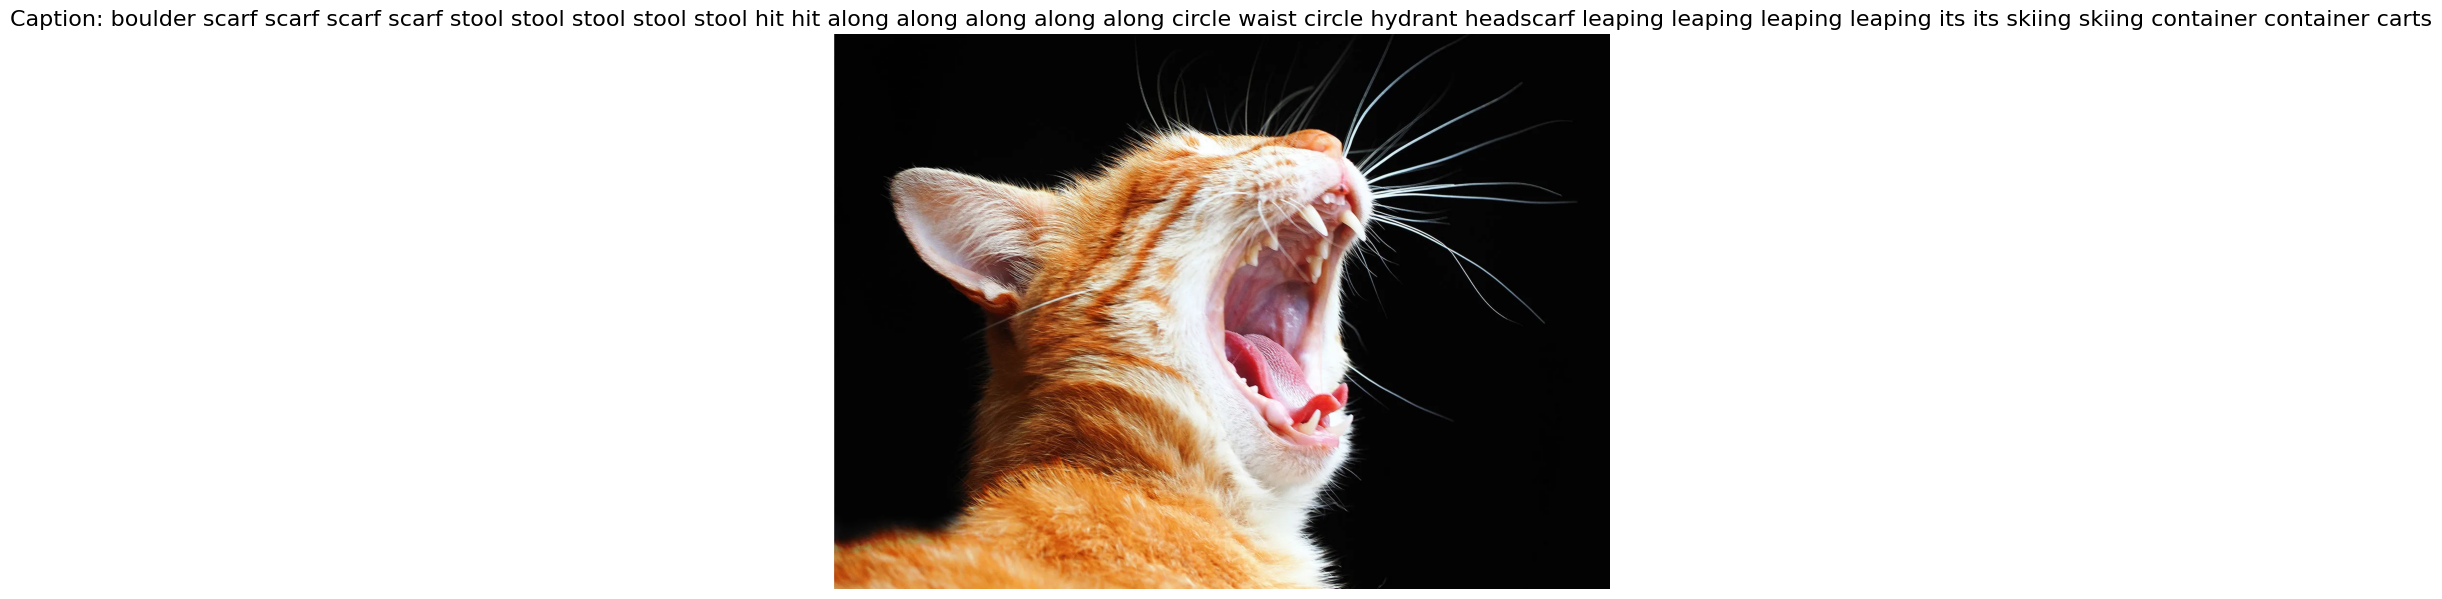

In [94]:
# Try the model with your own image
image_path = "D:\\Ed\\GL1\\Deep-Learning\\testing-images\\cat.webp"
try_with_image(image_path)

def caption_directory_images(directory_path):
    """Generate captions for all images in a directory"""
    if not os.path.isdir(directory_path):
        print(f"Error: {directory_path} is not a valid directory")
        return
        
    image_extensions = ['.jpg', '.jpeg', '.png', '.webp', '.bmp', '.gif']
    image_files = []
    for ext in image_extensions:
        image_files.extend(glob.glob(os.path.join(directory_path, f"*{ext}")))
        image_files.extend(glob.glob(os.path.join(directory_path, f"*{ext.upper()}")))
    
    print(f"Found {len(image_files)} images in directory")
    
    for img_path in image_files:
        print(f"\nProcessing {os.path.basename(img_path)}")
        try_with_image(img_path)

# Uncomment to caption all images in a directory
# import glob
# caption_directory_images("D:\\Ed\\GL1\\Deep-Learning\\testing-images")